In [4]:
import tensorflow as tf
import os as os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    



[]


In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/var/folders/s0/r8kflntd409d9kqhz2msfv3r0000gn/T/ipykernel_95938/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [1]:
data_dir = '/Users/priyanshiranawat/Desktop/DATA'

In [5]:
image_ext= ['jpeg','png','jpg','bmp']

In [2]:
os.listdir(os.path.join(data_dir,'/Users/priyanshiranawat/Desktop/DATA/happy people images - Google Search - 31_07_2024 22-35-59'))

NameError: name 'os' is not defined

In [7]:
import os

data_dir = '/Users/priyanshiranawat/Desktop/DATA'


for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


            

NotADirectoryError: [Errno 20] Not a directory: '/Users/priyanshiranawat/Desktop/DATA/.DS_Store'

In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [9]:
import numpy as np

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/Users/priyanshiranawat/Desktop/DATA')

Found 165 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
# batch has 2 parts images and labels ; 0= images , 1=labels
batch = data_iterator.next()

In [13]:
batch[1]
# class 1 = sad , class 0 = happy

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

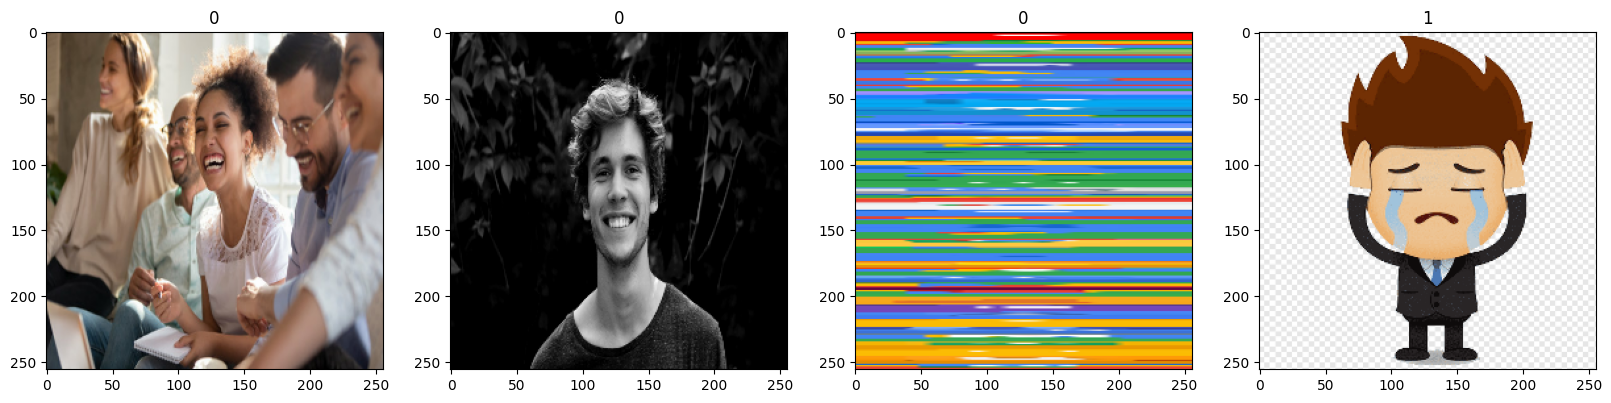

In [14]:
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
scaled=batch[0]/255
scaled.max()

1.0

In [16]:
data = data.map(lambda x,y : (x/255,y))


In [17]:
scaled_iterator= data.as_numpy_iterator()

In [18]:
batch= scaled_iterator.next()

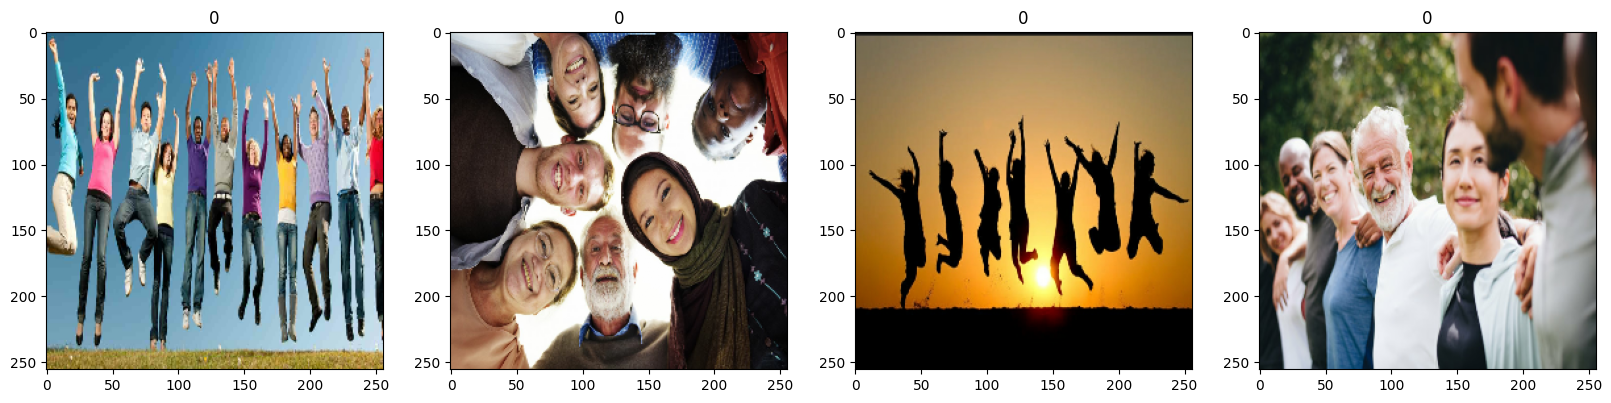

In [19]:
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [20]:
batch[0].max()

1.0

In [21]:
len(data)

6

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [23]:
train_size

4

In [24]:
val_size

2

In [25]:
test_size


1

In [26]:
train_size+val_size+test_size

7

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
len(test)

0

BUILDING DEEP LEARNING MODEL

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16,(3,3) ,1 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3) ,1 , activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3) ,1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/priyanshiranawat/CNN Image Classifier/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
logdir = '/Users/priyanshiranawat/CNN Image Classifier/LOGS'


In [35]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.4385 - loss: 1.3721 - val_accuracy: 0.4595 - val_loss: 0.6839
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.5750 - loss: 0.6587 - val_accuracy: 0.7027 - val_loss: 0.6154
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.7917 - loss: 0.6010 - val_accuracy: 0.7297 - val_loss: 0.5696
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.7073 - loss: 0.5649 - val_accuracy: 0.8649 - val_loss: 0.4680
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.8365 - loss: 0.4746 - val_accuracy: 0.8378 - val_loss: 0.4064
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8479 - loss: 0.4179 - val_accuracy: 0.8919 - val_loss: 0.3617
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.8990 - loss: 0.3332 - val_accuracy: 0.9189 - val_loss: 0.2426
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.8719 - loss: 0.3085 - val_accuracy: 0.9730 - val_loss:

In [37]:
hist.history

{'accuracy': [0.484375,
  0.59375,
  0.78125,
  0.6875,
  0.796875,
  0.859375,
  0.890625,
  0.875,
  0.8515625,
  0.859375,
  0.921875,
  0.953125,
  0.9609375,
  0.953125,
  0.96875,
  0.953125,
  0.96875,
  0.9609375,
  0.9609375,
  0.984375],
 'loss': [1.3871744871139526,
  0.6475776433944702,
  0.6041373610496521,
  0.5694940686225891,
  0.48685914278030396,
  0.41657933592796326,
  0.32758814096450806,
  0.3035167455673218,
  0.31777316331863403,
  0.3096010684967041,
  0.22560667991638184,
  0.1878189742565155,
  0.13957631587982178,
  0.12268226593732834,
  0.10735973715782166,
  0.1265992671251297,
  0.13628479838371277,
  0.11768988519906998,
  0.09824271500110626,
  0.06920087337493896],
 'val_accuracy': [0.45945945382118225,
  0.7027027010917664,
  0.7297297120094299,
  0.8648648858070374,
  0.837837815284729,
  0.8918918967247009,
  0.9189189076423645,
  0.9729729890823364,
  0.8648648858070374,
  0.8918918967247009,
  0.9189189076423645,
  0.9189189076423645,
  1.0,
  0.

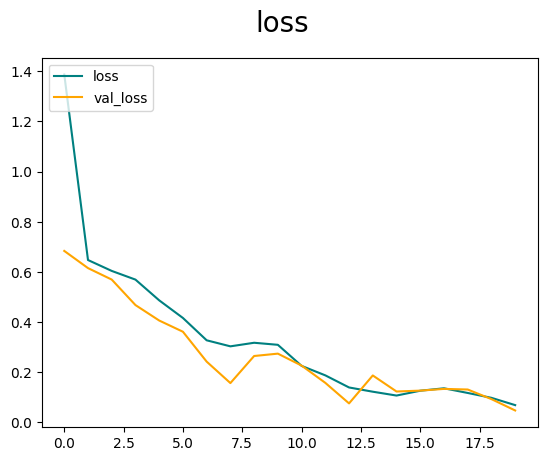

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize =20)
plt.legend(loc="upper left")
plt.show()

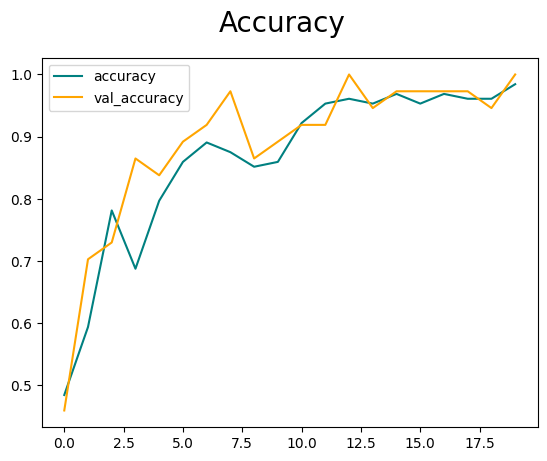

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize =20)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat= model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


2024-08-02 17:32:43.922642: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print(f'Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.0,Recall: 0.0,Accuracy:0.0


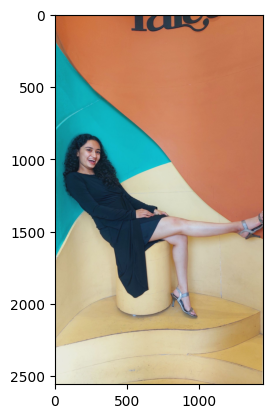

In [43]:
img = cv2.imread('/Users/priyanshiranawat/CNN Image Classifier/.venv/IMG_3044.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

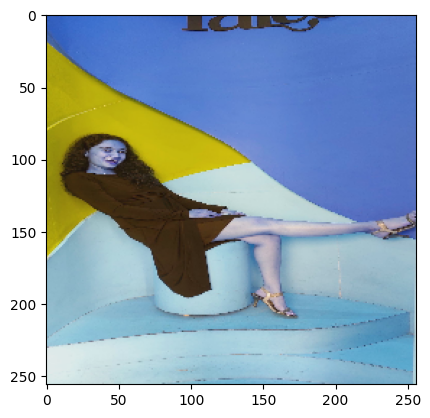

In [44]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [46]:
if yhat>0.5:
    print('Predicted class is SAD :(')
else:
    print("Predicted class is HAPPY :D")

Predicted class is HAPPY :D


In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','ImageClassifiers.h5'))

In [49]:
new_model= load_model(os.path.join('models','ImageClassifiers.h5'))

In [50]:
new_model

<Sequential name=sequential, built=True>

In [51]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [53]:
if yhat_new>0.5:
    print('Predicted class is SAD :(')
else:
    print("Predicted class is HAPPY :D")

Predicted class is HAPPY :D
